<a href="https://colab.research.google.com/github/rodrigorissettoterra/Analise-de-series-temporais/blob/main/An%C3%A1lise_das_vendas_de_uma_f%C3%A1brica_de_chocolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise da sazonalidade das vendas

##Preparando o ambiente

###Importando a biblioteca Pandas

In [18]:
#iportando a biblioteca Pandas, Seaborn, MatPlotLib e Datetime
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from datetime import date as dt

###Carregando a base de dados

In [19]:
choco = pd.read_csv('/content/drive/MyDrive/Base de dados/Alucar/chocolura.csv')
choco

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [20]:
#Verificando os tipos de dados existentes na base dados
choco.dtypes

mes       object
vendas     int64
dtype: object

###Convertendo dados

In [21]:
#Convertendo a data
choco['mes'] = pd.to_datetime(choco['mes'])
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

###Informações sobre a base de dados

In [22]:
#Imprimindo informações sobre a base de dados
print('Informações sobre a base de dados utilizada:\n')
print('O número de linhas é:',choco.shape[0])
print('O número de colunas é:',choco.shape[1])
print('\nA quantidade de dados nulos na base de dados é de:',choco.isna().sum().sum())

Informações sobre a base de dados utilizada:

O número de linhas é: 24
O número de colunas é: 2

A quantidade de dados nulos na base de dados é de: 0


##Cálculos para o desenvolvimento dos gráficos

In [23]:
#Criando duas novas colunas para alocar os resultados calculados
choco['variacao_mensal'] = choco['vendas'].diff()
choco['aceleracao'] = choco['variacao_mensal'].diff()
choco

,mes,vendas,variacao_mensal,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


###Criando uma função para imprimir 3 gráficos

In [24]:
#Criando uma função para configurar e imprimir 3 gráficos comparativos

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo,fontsize=18, loc='left')
  sns.lineplot(x = x, y = y1, data = dataset)
  ax.labelx = y1
  plt.subplot(3,1,2)
  sns.lineplot(x = x, y = y2, data = dataset)
  ax.labelx = y2
  plt.subplot(3,1,3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax.labelx = y3
  ax = ax

##Criando gráficos

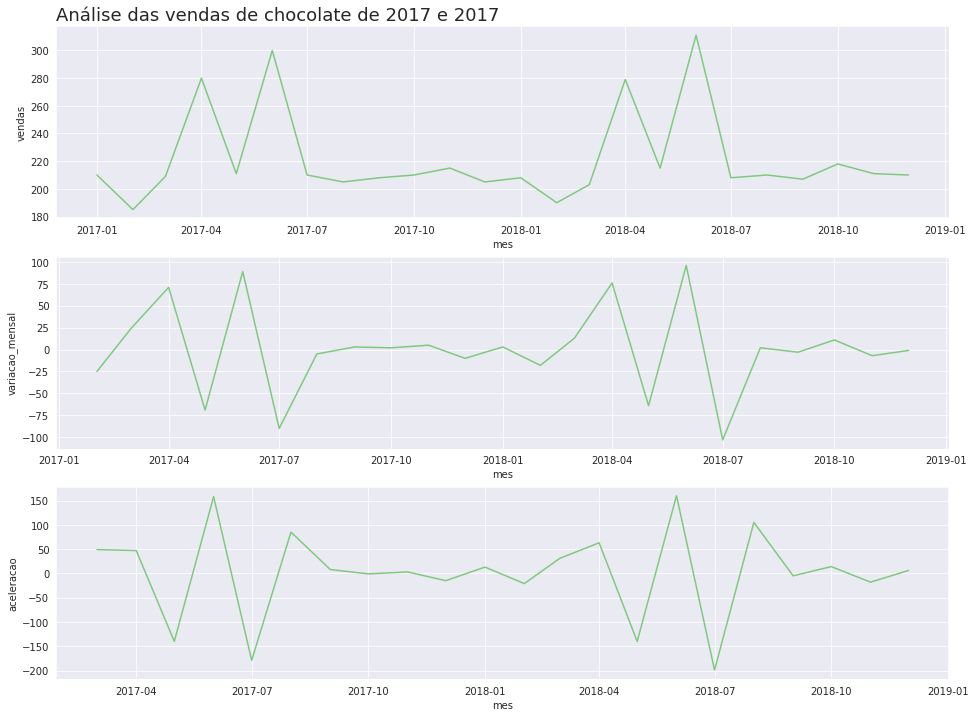

In [25]:
#Utilizando a função plot_comparacao

plot_comparacao(
    'mes',
    'vendas',
    'variacao_mensal',
    'aceleracao',
    choco,
    'Análise das vendas de chocolate de 2017 e 2017'
    )

**Gráfico 1:** Nota-se uma sazonalidade anual, com picos de vendas nos meses abril e junho, resultante do período da páscoa e do dia dos namorados</br>
**Gráfico 2:** Os picos de vendas em abril e junho são confirmados pela variação de vendas.</br>
**Gráfico 3:** A sazonalidade é comprovada também pelo gráfico.


#Vendas diárias de Outubro e Novembro

##Preparando o ambiente

###Carregando a base de dados


In [26]:
vendas_por_dia = pd.read_csv('/content/drive/MyDrive/Base de dados/Alucar/vendas_por_dia.csv')
vendas_por_dia

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [27]:
#Verificando os tipos de dados existentes na base dados
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

###Convertendo dados

In [28]:
#Convertendo a data
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

###Informações sobre a base de dados

In [29]:
#Imprimindo informações sobre a base de dados
print('Informações sobre a base de dados utilizada:\n')
print('O número de linhas é:',vendas_por_dia.shape[0])
print('O número de colunas é:',vendas_por_dia.shape[1])
print('\nA quantidade de dados nulos na base de dados é de:',vendas_por_dia.isna().sum().sum())

Informações sobre a base de dados utilizada:

O número de linhas é: 61
O número de colunas é: 2

A quantidade de dados nulos na base de dados é de: 0


##Cálculos para o desenvolvimento dos gráficos

In [30]:
#Criando duas novas colunas para alocar os resultados calculados
vendas_por_dia['variacao_diaria'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['variacao_diaria'].diff()
vendas_por_dia

,dia,vendas,variacao_diaria,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
...,...,...,...,...
56,2018-11-26,54,34.0,31.0
57,2018-11-27,60,6.0,-28.0
58,2018-11-28,49,-11.0,-17.0
59,2018-11-29,50,1.0,12.0


##Criando os gráficos

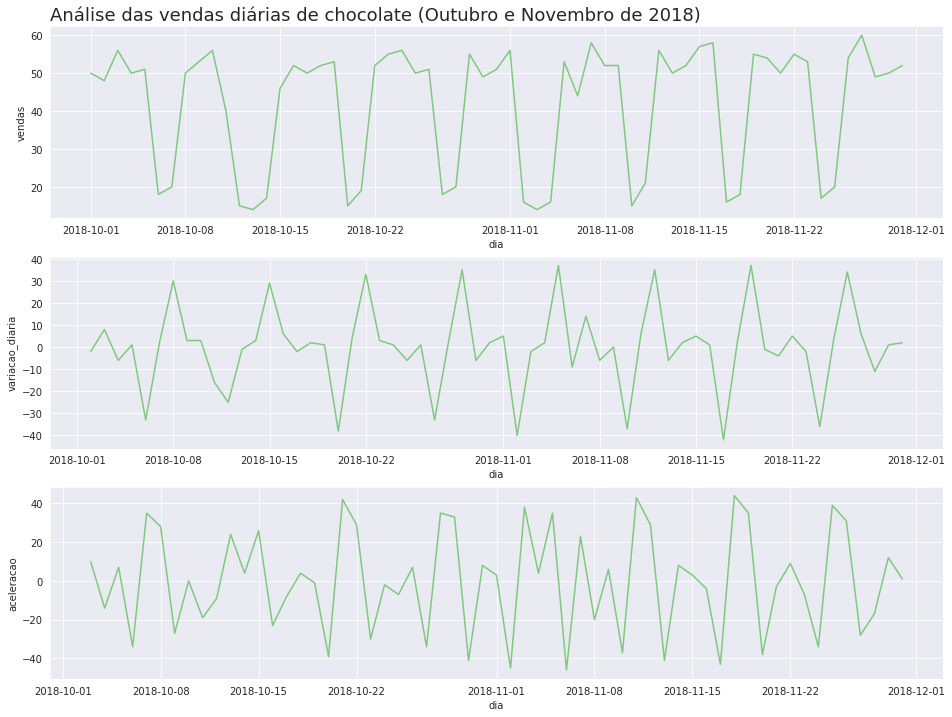

In [31]:
#Utilizando a função plot_comparacao

plot_comparacao(
    'dia',
    'vendas',
    'variacao_diaria',
    'aceleracao',
    vendas_por_dia,
    'Análise das vendas diárias de chocolate (Outubro e Novembro de 2018)'
    )

Podemos notar um padrão de sazonalidade nos 3 gráficos

#Analisando a sazonalidade

In [32]:
#Adicionando uma coluna extra para armazenar os dias da semana
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday
vendas_por_dia

,dia,vendas,variacao_diaria,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,0
57,2018-11-27,60,6.0,-28.0,1
58,2018-11-28,49,-11.0,-17.0,2
59,2018-11-29,50,1.0,12.0,3


In [33]:
#Substituindo os valores da coluna dia_da_semana com os nomes dos dias

dias_da_semana = {
    0:'Segunda-feira',
    1:'Terça-feira',
    2:'Quarta-feira',
    3:'Quinta-Feira',
    4:'Sexta-feira',
    5:'Sábado',
    6:'Domingo'
    }

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_da_semana)
vendas_por_dia

,dia,vendas,variacao_diaria,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-feira
1,2018-10-02,48,-2.0,NaN,Terça-feira
2,2018-10-03,56,8.0,10.0,Quarta-feira
3,2018-10-04,50,-6.0,-14.0,Quinta-Feira
4,2018-10-05,51,1.0,7.0,Sexta-feira
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda-feira
57,2018-11-27,60,6.0,-28.0,Terça-feira
58,2018-11-28,49,-11.0,-17.0,Quarta-feira
59,2018-11-29,50,1.0,12.0,Quinta-Feira


In [34]:
#Agrupando os dados por dia

vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','variacao_diaria','aceleracao'].mean().round(2)
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,vendas,variacao_diaria,aceleracao
dia_da_semana,,,
Domingo,18.88,3.00,30.75
Quarta-feira,53.11,1.44,2.11
Quinta-Feira,51.33,-1.78,-3.22
Segunda-feira,52.33,33.75,30.75
Sexta-feira,44.56,-6.78,-5.00
Sábado,15.88,-27.75,-19.88
Terça-feira,51.67,-0.67,-34.25


#Correlações

In [39]:
#importando uma biblioteca para calcular correlações

from pandas.plotting import autocorrelation_plot

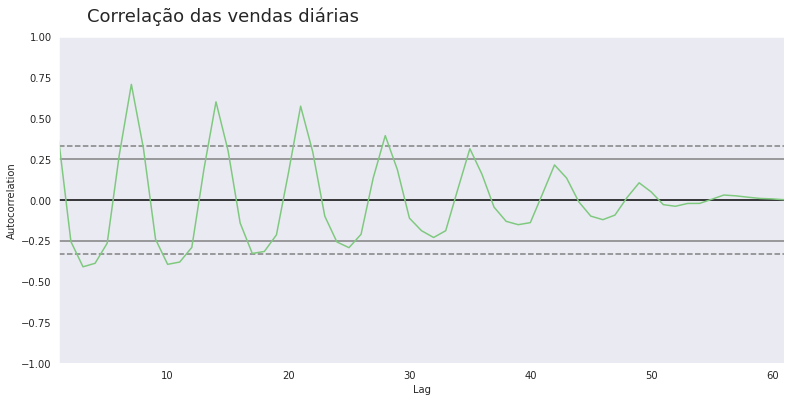

In [48]:
#Gráfico da correlação nas vendas diárias
ax = plt.figure(figsize = (13,6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

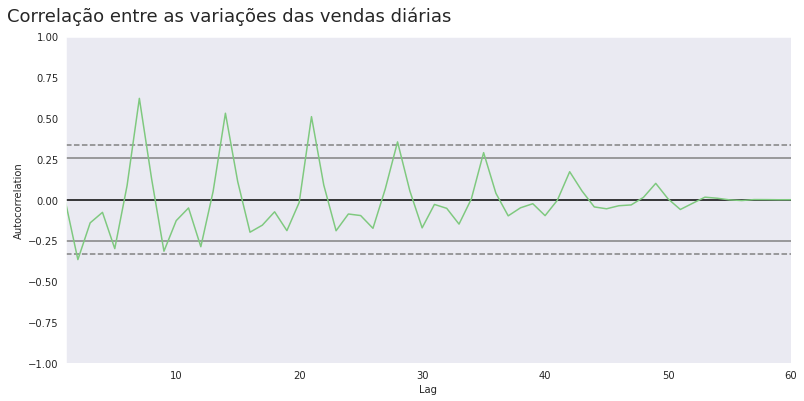

In [51]:
#Gráfico da correlação variações nas vendas diárias
ax1 = plt.figure(figsize = (13,6))
ax1.suptitle('Correlação entre as variações das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['variacao_diaria'][1:])
ax1 = ax1

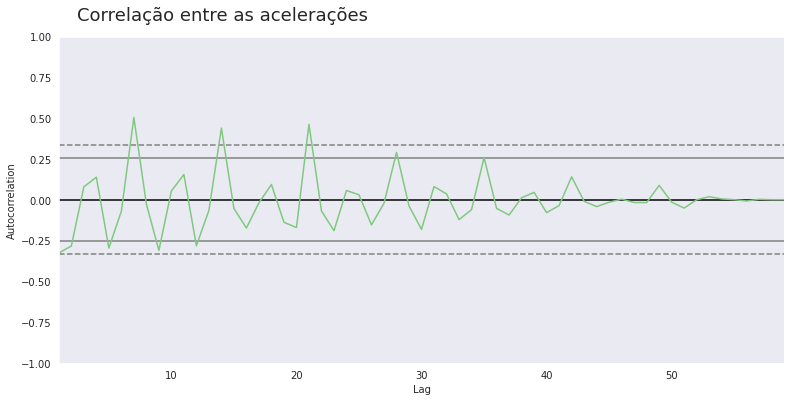

In [52]:
#Gráfico da correlação acelerações
ax2 = plt.figure(figsize = (13,6))
ax2.suptitle('Correlação entre as acelerações', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax2 = ax2